<a href="https://colab.research.google.com/github/Samridhi0705/MajorProject/blob/main/mp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!pip install telethon nest_asyncio

import nest_asyncio
nest_asyncio.apply()


In [ ]:
import os
import csv
from telethon import TelegramClient, events
from datetime import datetime

# Remove old session to force fresh login each time
if os.path.exists('bot_session.session'):
    os.remove('bot_session.session')

api_id = '28932578'
api_hash = 'e73796fdffd4d3fa973e1aedbe803311'
bot_token = '8315747892:AAHpfpYvvuC9lXBpycHHOBarC8_DTvOV0fs'  # Your bot token

client = TelegramClient('bot_session', api_id, api_hash)

# CSV file name
csv_file = 'flagged_messages.csv'

# Initialize CSV file with headers (only once)
if not os.path.exists(csv_file):
    with open(csv_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['timestamp', 'sender_id', 'message'])

async def main():
    await client.start(bot_token=bot_token)

    @client.on(events.NewMessage)
    async def handler(event):
        msg = event.message.message
        sender = await event.get_sender()
        sender_id = sender.id if sender else 'Unknown'
        timestamp = event.message.date.strftime("%Y-%m-%d %H:%M:%S")

        print(f"New message from {sender_id} at {timestamp}: {msg}")

        # Append message data to CSV
        with open(csv_file, 'a', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow([timestamp, sender_id, msg])

    print("Bot is running and saving messages to", csv_file)
    await client.run_until_disconnected()

await main()


In [92]:
import pandas as pd
import re

# Load your saved messages
df = pd.read_csv('cleaned_messages.csv')

# Basic cleaning function
def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)       # Remove URLs
    text = re.sub(r'@\S+', '', text)          # Remove mentions
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # Remove special chars
    text = text.lower().strip()               # Lowercase and trim
    return text

df['clean_message'] = df['message'].apply(clean_text)
df.to_csv('cleaned_messages.csv', index=False)
df.head()


,timestamp,sender_id,message,clean_message,suspicious
0,2025-07-28 17:04:10,8432945463,weed is on the way ?? do you want cocaine too.,weed is on the way do you want cocaine too,1
1,2025-07-28 17:13:01,8432945463,weed is on the way ?? do you want cocaine too.,weed is on the way do you want cocaine too,1


In [93]:
# Define your suspicious keywords list
keywords = ['drug', 'cocaine', 'weed', 'lsd', 'ecstasy', 'heroin', 'meth']

def is_suspicious(text):
    text = str(text).lower()
    return any(word in text for word in keywords)

# Ensure you have a message column (often 'message' or 'clean_message')
if 'clean_message' in df.columns:
    text_col = 'clean_message'
elif 'message' in df.columns:
    text_col = 'message'
else:
    raise ValueError("No column with message text found!")

# Create the suspicious column
df['suspicious'] = df[text_col].apply(is_suspicious)

# Now you can proceed with your analysis using df['suspicious']
print(df[['message', 'suspicious']].head())


                                          message  suspicious
0  weed is on the way ?? do you want cocaine too.        True
1  weed is on the way ?? do you want cocaine too.        True


In [94]:
from google.colab import files
files.download('cleaned_messages.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

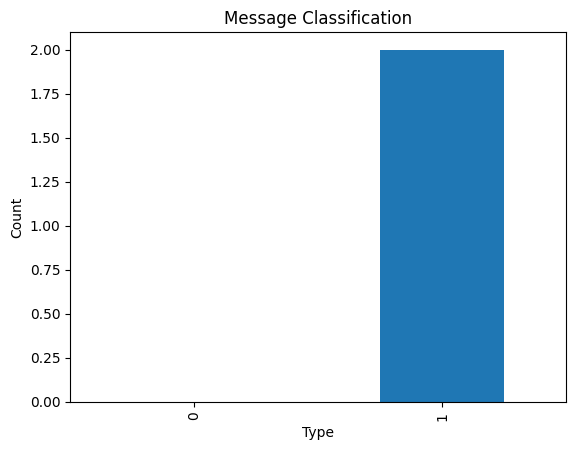

In [95]:
import matplotlib.pyplot as plt

# Ensure suspicious column is int
df['suspicious'] = df['suspicious'].astype(int)

# Get counts of both classes (0 and 1).
# Use reindex to ensure both 0 and 1 appear, even if one count is missing (will fill 0 count)
counts = df['suspicious'].value_counts().reindex([0,1], fill_value=0)

# Plot with correct tick labels matching counts
counts.plot(kind='bar', tick_label=['Normal', 'Suspicious'])

plt.title('Message Classification')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [96]:
df['sender_id'].value_counts().head()


,count
sender_id,
8432945463,2


In [97]:
print(df.columns)

Index(['timestamp', 'sender_id', 'message', 'clean_message', 'suspicious'], dtype='object')


In [99]:
df.to_csv('cleaned_messages.csv', index=False)


In [100]:
import pandas as pd

df = pd.read_csv('cleaned_messages.csv')  # Use your actual filename
print(df.columns)


Index(['timestamp', 'sender_id', 'message', 'clean_message', 'suspicious'], dtype='object')


In [101]:
print(df[['message','suspicious']].head())
df['suspicious']  # All suspicious messages


                                          message  suspicious
0  weed is on the way ?? do you want cocaine too.           1
1  weed is on the way ?? do you want cocaine too.           1


,suspicious
0,1
1,1


In [102]:
df['suspicious'] = df['suspicious'].astype(int)


In [103]:
df = pd.read_csv('cleaned_messages.csv')
X = df['clean_message']
y = df['suspicious']
print (X)
print("----------------------------")
print(y)


0    weed is on the way  do you want cocaine too
1    weed is on the way  do you want cocaine too
Name: clean_message, dtype: object
----------------------------
0    1
1    1
Name: suspicious, dtype: int64


In [104]:
print(f"Train size: {len(y_train)} samples")
print(f"Test size: {len(y_test)} samples")
print(y_test.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_vec, y, cv=2, scoring='f1')
print("Cross-validation F1 scores:", scores)
print("Mean F1 score:", scores.mean())


Train size: 1 samples
Test size: 1 samples
suspicious
1    1
Name: count, dtype: int64
Cross-validation F1 scores: [1. 1.]
Mean F1 score: 1.0


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load and prepare data
df = pd.read_csv('cleaned_messages.csv')
# Assume 'suspicious' column exists (1=suspicious, 0=normal)
X = df['clean_message']
y = df['suspicious']

# Vectorize text
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train basic model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [106]:
import hashlib

# For each suspicious message, compute hash and (optionally) store/send it
df = df[df['suspicious'] == 1]
df['message_hash'] = df['message'].apply(lambda x: hashlib.sha256(str(x).encode('utf-8')).hexdigest())
df.to_csv('suspicious_messages_with_hash.csv', index=False)

# Display hashes for evidence
print(df[['message', 'message_hash']].head())
print(df.columns)

                                          message  \
0  weed is on the way ?? do you want cocaine too.   
1  weed is on the way ?? do you want cocaine too.   

                                        message_hash  
0  d125fcee3d21ba36e7833fa2d55eaf636b3141a1bec9ec...  
1  d125fcee3d21ba36e7833fa2d55eaf636b3141a1bec9ec...  
Index(['timestamp', 'sender_id', 'message', 'clean_message', 'suspicious',
       'message_hash'],
      dtype='object')


In [107]:
from google.colab import files
files.download('suspicious_messages_with_hash.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
import hashlib

# Add a tamper-proof hash column for each suspicious message
df['message_hash'] = df['message'].apply(lambda x: hashlib.sha256(str(x).encode('utf-8')).hexdigest())
df[['message','message_hash']].head()

,message,message_hash
0,weed is on the way ?? do you want cocaine too.,d125fcee3d21ba36e7833fa2d55eaf636b3141a1bec9ec...
1,weed is on the way ?? do you want cocaine too.,d125fcee3d21ba36e7833fa2d55eaf636b3141a1bec9ec...


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


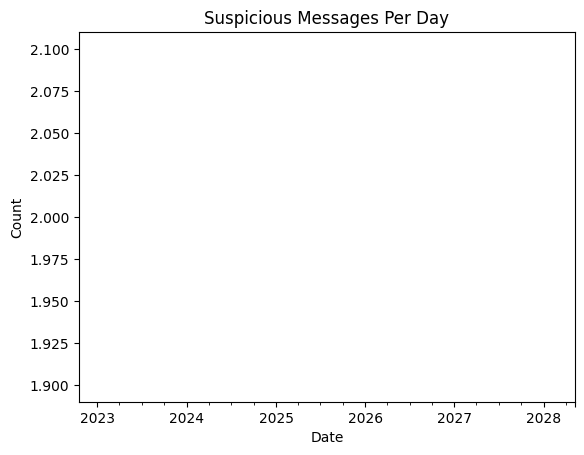

In [109]:
# Messages over time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.resample('D')['suspicious'].sum().plot(kind='line', title='Suspicious Messages Per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


Text(0.5, 1.0, 'Suspicious')

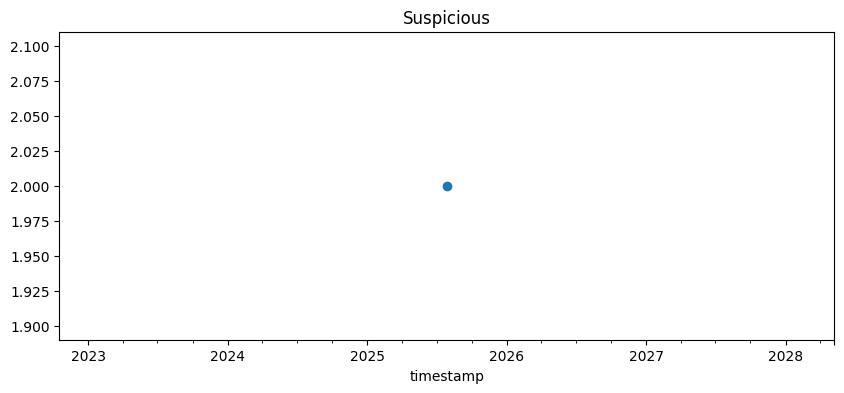

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (make sure you have 'timestamp' and 'suspicious' columns)
df = pd.read_csv('cleaned_messages.csv')  # or your relevant CSV
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['suspicious'] = df['suspicious'].astype(int)
df.set_index('timestamp', inplace=True)
# Group and sum flagged messages per day
daily = df.resample('D')['suspicious'].sum()

plt.figure(figsize=(10,4))
daily.plot(kind='line', marker='o')
plt.title('Suspicious')
